# Data Visualization and Exploration

Simple notebook to visualize data

In [1]:
import os
from pathlib import Path

In [2]:
# change working directory to the root of the project
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir("..")

In [3]:
import numpy as np
import albumentations as alb
from albumentations.pytorch import ToTensorV2
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from baseg.datasets import EMSImageDataset, EMSCropDataset
from baseg.samplers import RandomTiledSampler


In [4]:
targets = {
    "S2L2A": "image",
    "DEL": "mask",
    "CM": "mask",
    "GRA": "mask",
    "ESA_LC": "mask",
}

In [5]:
train_transform = alb.Compose(
    [
        alb.Flip(),
        alb.RandomRotate90(),
        alb.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05),
        ToTensorV2(),
    ], additional_targets=targets)
eval_transform = alb.Compose([
    ToTensorV2(),
], additional_targets=targets)

In [6]:
dataset = EMSImageDataset(root=Path("data/ems"), subset="train", transform=train_transform)
crop_dataset = EMSCropDataset(root=Path("data/ems"), subset="train", transform=train_transform)
val_dataset = EMSImageDataset(root=Path("data/ems"), subset="val", transform=eval_transform)
val_crop_dataset = EMSCropDataset(root=Path("data/ems"), subset="val", transform=eval_transform)

In [7]:
len(dataset), len(crop_dataset), len(val_dataset), len(val_crop_dataset)

(399, 399, 62, 62)

In [8]:
def mask2rgb(image: np.ndarray, palette: dict) -> np.ndarray:
    lut = np.zeros((256, 3), dtype=np.uint8)
    for k, v in palette.items():
        lut[k, :] = v
    return lut[image]

In [18]:
loader = DataLoader(
    crop_dataset,
    sampler=RandomTiledSampler(crop_dataset, tile_size=256),
    batch_size=4,
    num_workers=4,
    pin_memory=True,
)

In [ ]:
for batch in loader:
    for i in range(len(batch)):
        s2 = batch["S2L2A"][i][[3,2,1]].numpy()
        lc = batch["ESA_LC"][i].numpy().astype(np.uint8)
        msk = batch["DEL"][i].numpy().astype(np.uint8)
        s2 = np.moveaxis(s2, 0, -1) * 3
        s2 = np.clip(s2, 0, 1)
        lc = mask2rgb(lc, palette=crop_dataset.palette)
        fig, ax = plt.subplots(1, 3, figsize=(10, 5))
        ax[0].imshow(s2)
        ax[1].imshow(lc)
        ax[2].imshow(msk)
        plt.show()
    
    input("Press Enter to continue...")
    plt.close("all")

In [15]:
loader = DataLoader(
    dataset,
    batch_size=1,
    num_workers=1,
    pin_memory=True,
)

data/ems/train/EMSR250/AOI03/EMSR250_AOI03_23/EMSR250_AOI03_23_S2L2A.tif


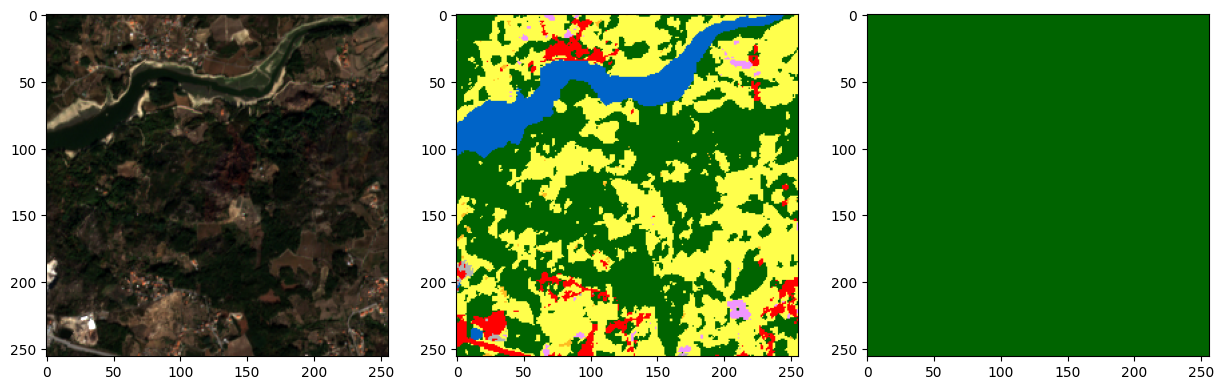

data/ems/train/EMSR535/AOI02/EMSR535_AOI02_04/EMSR535_AOI02_04_S2L2A.tif


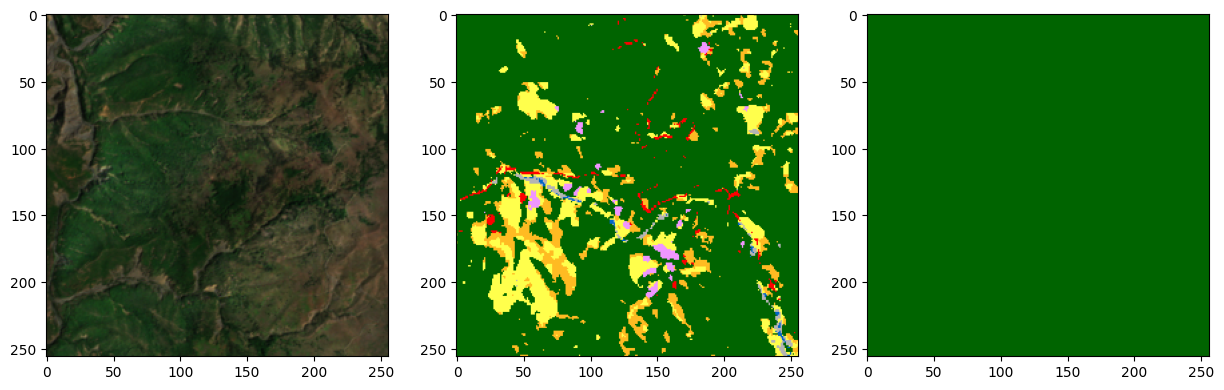

data/ems/train/EMSR647/AOI02/EMSR647_AOI02_16/EMSR647_AOI02_16_S2L2A.tif


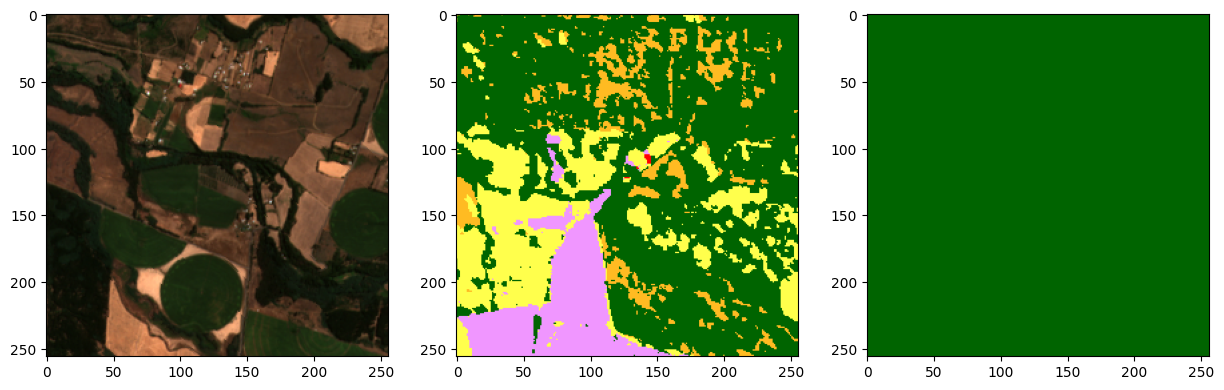

data/ems/train/EMSR647/AOI07/EMSR647_AOI07_04/EMSR647_AOI07_04_S2L2A.tif


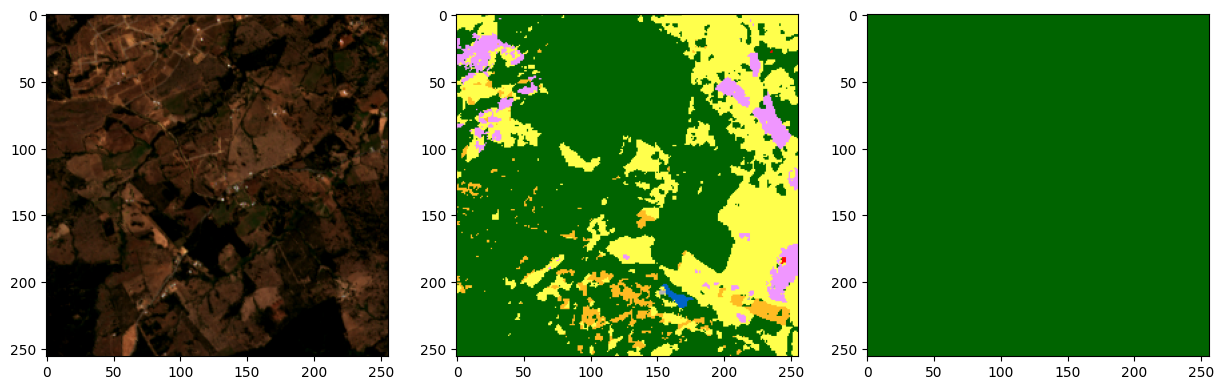

KeyboardInterrupt: Interrupted by user

In [27]:
from IPython import display

for batch in loader:
    length = batch["S2L2A"].shape[0]
    for i in range(length):
        print(batch["metadata"]["S2L2A"][i])
        s2 = batch["S2L2A"][i][[3,2,1]].numpy()
        lc = batch["ESA_LC"][i].numpy().astype(np.uint8)
        msk = batch["DEL"][i].numpy().astype(np.uint8)
        s2 = np.moveaxis(s2, 0, -1) * 3
        s2 = np.clip(s2, 0, 1)
        lc = mask2rgb(lc, palette=crop_dataset.palette)
        dl = mask2rgb(msk, palette=crop_dataset.palette)
        fig, ax = plt.subplots(1, 3, figsize=(15, 7))
        ax[0].imshow(s2)
        ax[1].imshow(lc)
        ax[2].imshow(dl)
        plt.show()
        
    input("Press Enter to continue...")
    plt.close("all")
    display.clear_output(wait=True)